In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

In [3]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

/home/tralala/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

In [4]:
dict_keys(['data', 'target', 'feature_names', 'DESCR'])

NameError: name 'dict_keys' is not defined

In [5]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [6]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston['MEDV'] = boston_dataset.target

In [8]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

/tmp/ipykernel_26273/1962179664.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston['MEDV'], bins=30)


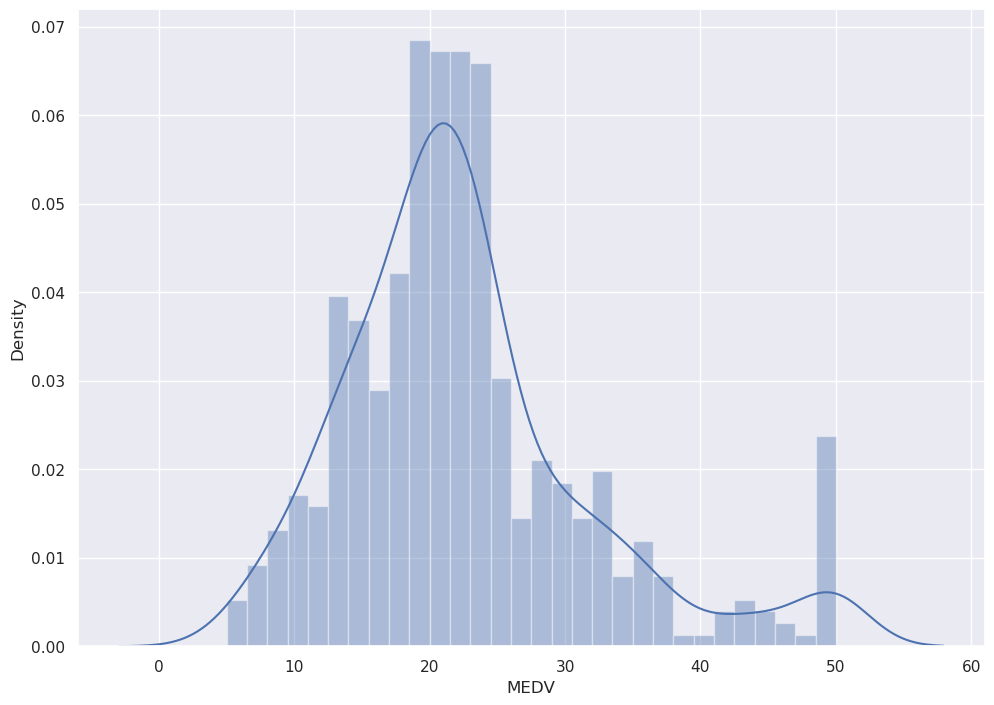

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

<Axes: >

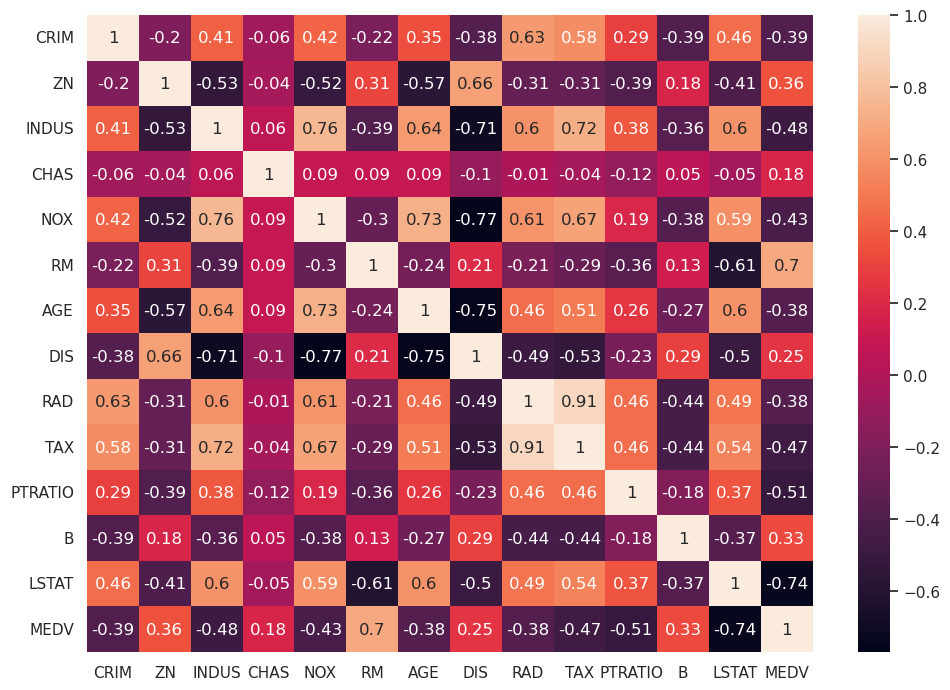

In [11]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [12]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(Y, X, test_size=0.3, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train, Y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[28.7 21.2 19.3 23.1 19.1 25.  33.4  5.  29.6 18.7 21.7 23.1 22.8 21.
 48.8 14.6 16.6 27.1 20.1 19.8 21.  41.3 23.2 20.4 18.5 29.4 36.4 24.4
 11.8 13.8 12.3 17.8 33.1 26.7 13.4 14.4 50.  22.  19.9 23.8 17.5 12.7
  5.6 31.1 26.2 19.4 16.7 13.8 22.9 15.3 27.5 36.1 22.9 24.5 25.  50.
 34.9 31.7 24.1 22.1 14.1 42.8 19.3 32.2 26.4 21.8 21.7  8.3 46.7 43.1
 31.5 10.5 16.7 20.  33.3 17.8 50.  20.5 23.2 13.1 19.6 22.8 28.7 30.7
 22.9 21.9 23.9 32.7 24.3 21.5 24.6  8.5 26.4 23.1 15.   8.8 19.3 23.9
 24.7 19.8 23.8 13.3 29.  27.1 34.6 13.3 15.6 12.5 14.6 11.  24.8 17.3
  8.1 21.4 15.6 23.3 32.  38.7 30.1 20.5 32.5 42.3 24.3 20.6 22.  18.2
 15.   6.3 20.1 21.4 28.4 30.1 20.8 23.  14.3 11.7 37.3 17.1 10.4 23.
 22.7 20.3 21.7 50.   8.4 18.8 37.2 16.1 16.5 22.2 20.6 13.5 48.3 23.8
 22.7 17.4 30.3 36.  41.7 18.3 22.  18.6 44.8 11.9 18.7 16.2 22.   7.2
 20.4 13.8 13.  18.4 23.1 21.2 23.1 23.5 50.  26.6 22.2 50.   8.3 23.3
 21.7 18.9 18.4 17.4 13.4 12.1 26.6 21.7 28.4 20.5 22.  13.9 11.3 29.9
 26.6 10.5 23.2 24.4 46.  21.9  7.5 36.2 44.  17.8 27.5 37.6 14.1 28.1
 10.2 19.1 43.8 27.9 25.  16.  16.6 13.2 50.  22.2 32.9 15.2 14.8 13.8
 24.3 33.8 22.3 50.   9.5 13.3 22.2 18.1 18.  25.  16.5 23.  20.1 33.
 24.8 18.2 13.1 34.9 10.2 19.9 27.9 23.3 35.1 12.8 22.  18.5 25.1 22.5
 22.4 28.6 19.5 24.8 24.5 21.4 33.1 22.9 20.7 24.1 50.  24.7 28.7  7.2
 37.  20.3 30.1 19.5 23.4 11.5 21.6 14.9 15.2 19.4  8.4 28.  22.6 13.5
 14.5 31.  10.9 21.9 22.  19.  21.4 25.  17.5 36.5 20.1 20.4 16.2 23.6
  7.4 35.2 50.  19.3 21.2 15.6 33.4 19.1 21.  23.7 18.9 16.8 19.7 17.7
 22.6 11.8 34.9 20.6 20.2 32.  22.3 23.3 14.4 31.2 24.  29.6 19.6 21.6
 20.  27.  33.2 15.4 30.5  7.2 23.9 16.3 23.9 50.  22.8 15.4 19.2 19.6
 22.6 33.2 50.  22.2 14.9 19.8 23.7 19.  20.3 11.9 13.6 29.8 21.7 19.5
 21.1 24.5 13.4 18.6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [22]:
X_train

pandas.core.series.Series